Estimated Brier scores (lower is better):
                            Accuracy  Avg Confidence  Estimated Brier Score
claude-3-5-sonnet-20240620  0.740000        8.603333               0.206880
gpt-4o-2024-05-13           0.740072        8.859206               0.207923
claude-3-opus-20240229      0.703518        8.537688               0.228642
ClaudeOpuWeb-raw            0.656667        7.990000               0.245775
GPT4Web                     0.662207        8.785953               0.267136
Llama3.1-405B               0.640000        8.473333               0.273387
gpt-4-0613                  0.665306        9.024490               0.277816
MistralLarge-Poe            0.605351        8.130435               0.281593
GeminiAdvancedWeb-raw       0.584906        8.200000               0.297451
Llama3.1-70B                0.581940        8.505017               0.312664
ClaudeSonnetWeb-raw         0.553333        8.370000               0.326125
Llama3-70b-Poe              0.546667        8.

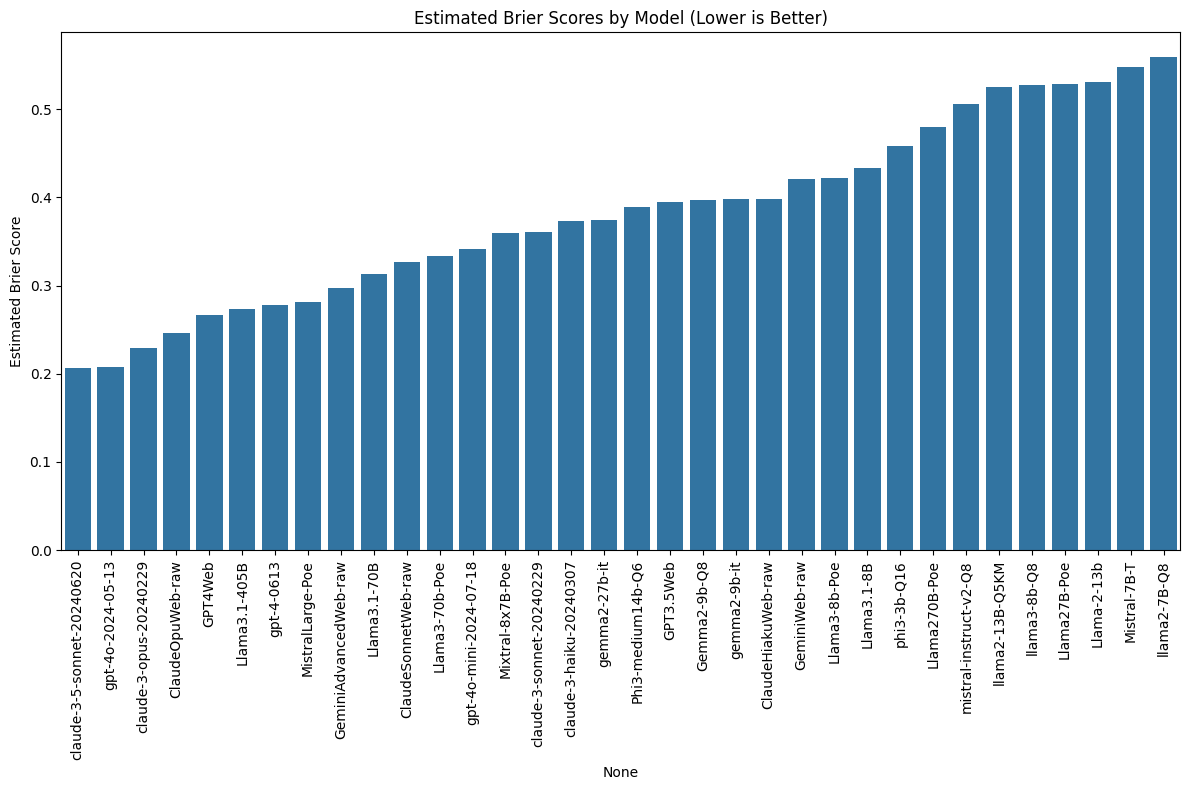

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import brier_score_loss
import numpy as np

# Load the results
results_df = pd.read_csv('CSV/model_performance_results.csv', index_col=0)



# Estimating Brier scores
def estimate_brier_score(accuracy, avg_confidence):
    # This is a rough estimation
    y_true = np.concatenate([np.ones(int(accuracy * 100)), np.zeros(int((1-accuracy) * 100))])
    y_pred = np.full_like(y_true, avg_confidence / 10)  # Assuming confidence is on a 0-10 scale
    return brier_score_loss(y_true, y_pred)

brier_scores = results_df.apply(lambda row: estimate_brier_score(row['Accuracy'], row['Avg Confidence']), axis=1)

# Adding Brier scores to the DataFrame
results_df['Estimated Brier Score'] = brier_scores

# Sorting and displaying results
results_df_sorted = results_df.sort_values('Estimated Brier Score')
print("Estimated Brier scores (lower is better):")
print(results_df_sorted[['Accuracy', 'Avg Confidence', 'Estimated Brier Score']])

# Plotting Brier scores
plt.figure(figsize=(12, 8))
sns.barplot(x=results_df_sorted.index, y='Estimated Brier Score', data=results_df_sorted)
plt.xticks(rotation=90)
plt.title('Estimated Brier Scores by Model (Lower is Better)')
plt.tight_layout()
plt.show()

In [3]:
average = results_df["Estimated Brier Score"].mean()
std_deviation = results_df["Estimated Brier Score"].std()

# Print the results
print(f"Average Estimated Brier Score: {average:.4f}")
print(f"Standard Deviation Estimated Brier Score: {std_deviation:.4f}")

# Print the average +/- SD
print(f"Average +/- SD: {average:.4f} +/- {std_deviation:.4f}")

# Alternatively, you can use the following format
print(f"Average +/- SD: {average:.4f} +-{std_deviation:.4f}")

Average Estimated Brier Score: 0.3818
Standard Deviation Estimated Brier Score: 0.1030
Average +/- SD: 0.3818 +/- 0.1030
Average +/- SD: 0.3818 +-0.1030


In [5]:
print(results_df_sorted.index.to_list())

['claude-3-5-sonnet-20240620', 'gpt-4o-2024-05-13', 'claude-3-opus-20240229', 'ClaudeOpuWeb-raw', 'GPT4Web', 'Llama3.1-405B', 'gpt-4-0613', 'MistralLarge-Poe', 'GeminiAdvancedWeb-raw', 'Llama3.1-70B', 'ClaudeSonnetWeb-raw', 'Llama3-70b-Poe', 'gpt-4o-mini-2024-07-18', 'Mixtral-8x7B-Poe', 'claude-3-sonnet-20240229', 'claude-3-haiku-20240307', 'gemma2-27b-it', 'Phi3-medium14b-Q6', 'GPT3.5Web', 'Gemma2-9b-Q8', 'gemma2-9b-it', 'ClaudeHiakuWeb-raw', 'GeminiWeb-raw', 'Llama3-8b-Poe', 'Llama3.1-8B', 'phi3-3b-Q16', 'Llama270B-Poe', 'mistral-instruct-v2-Q8', 'llama2-13B-Q5KM', 'llama3-8b-Q8', 'Llama27B-Poe', 'Llama-2-13b', 'Mistral-7B-T', 'llama2-7B-Q8']


In [6]:
gpt_models = [
    'gpt-4o-2024-05-13',
    'gpt-4-0613',
    'gpt-4o-mini-2024-07-18',
    'GPT4Web',
    'GPT3.5Web'
]

claude_models = [
    'claude-3-5-sonnet-20240620',
    'claude-3-opus-20240229',
    'ClaudeOpuWeb-raw',
    'claude-3-sonnet-20240229',
    'claude-3-haiku-20240307',
    'ClaudeSonnetWeb-raw',
    'ClaudeHiakuWeb-raw'
]

mistral_models = [
    'MistralLarge-Poe',
    'Mixtral-8x7B-Poe',
    'mistral-instruct-v2-Q8',
    'Mistral-7B-T'
]

google_models = [
    'GeminiAdvancedWeb-raw',
    'gemma2-27b-it',
    'Gemma2-9b-Q8',
    'gemma2-9b-it',
    'GeminiWeb-raw'
]

phi_models = [
    'Phi3-medium14b-Q6',
    'phi3-3b-Q16'
]

other_models = [
    'Llama3.1-405B',
    'Llama3.1-70B',
    'Llama3.1-8B',
    'Llama3-70b-Poe',
    'Llama3-8b-Poe',
    'Llama270B-Poe',
    'llama2-13B-Q5KM',
    'llama3-8b-Q8',
    'Llama27B-Poe',
    'Llama-2-13b',
    'llama2-7B-Q8'
]

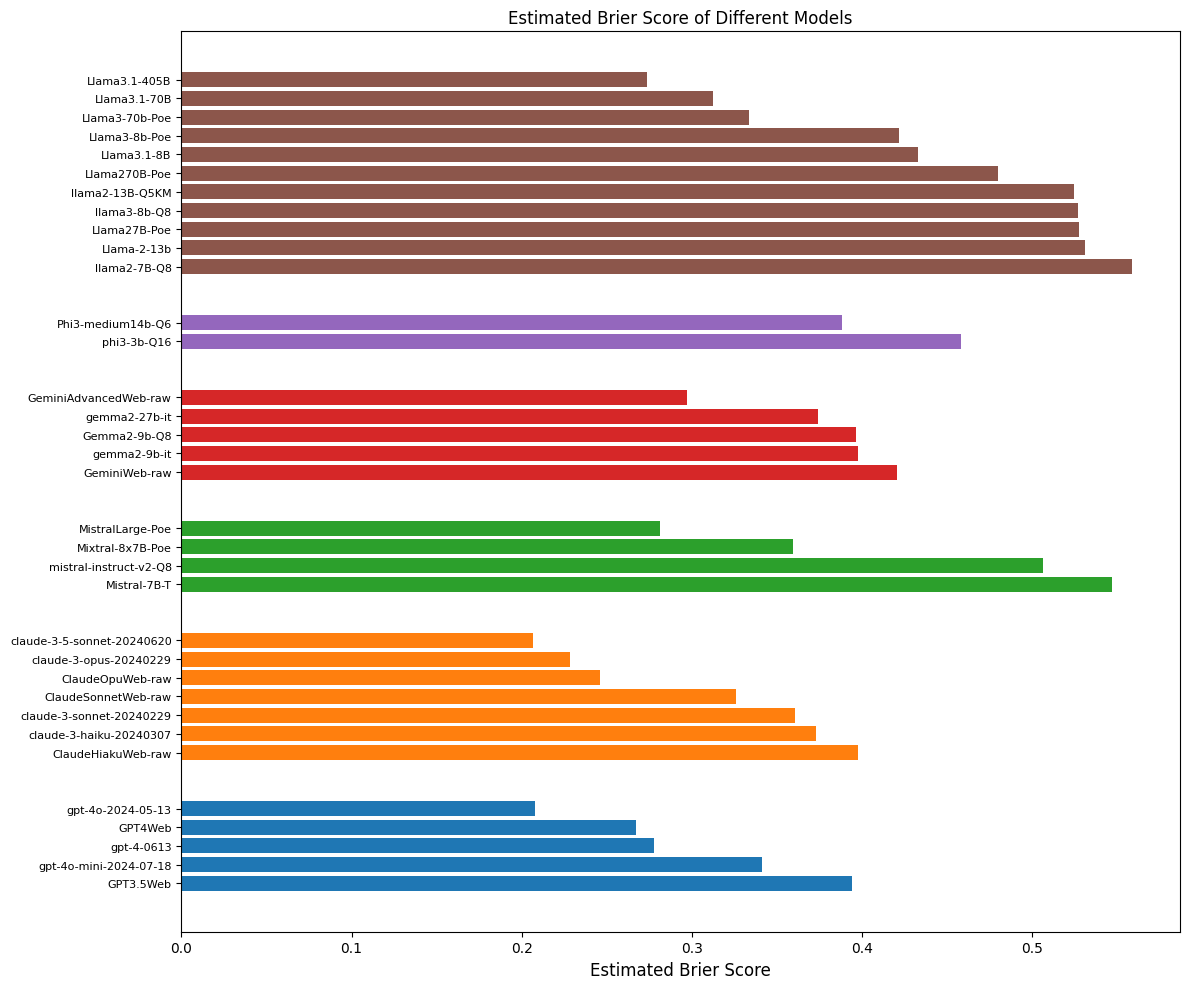

In [8]:
# Create DataFrames for each model list
gpt_df = results_df_sorted[results_df_sorted.index.isin(gpt_models)].sort_values('Estimated Brier Score', ascending=False)
claude_df = results_df_sorted[results_df_sorted.index.isin(claude_models)].sort_values('Estimated Brier Score', ascending=False)
mistral_df = results_df_sorted[results_df_sorted.index.isin(mistral_models)].sort_values('Estimated Brier Score', ascending=False)
google_df = results_df_sorted[results_df_sorted.index.isin(google_models)].sort_values('Estimated Brier Score', ascending=False)
phi_df = results_df_sorted[results_df_sorted.index.isin(phi_models)].sort_values('Estimated Brier Score', ascending=False)
others_df = results_df_sorted[results_df_sorted.index.isin(other_models)].sort_values('Estimated Brier Score', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Keeping track of y-axis positions and labels
y_positions = []
y_tick_labels = []

# Gap between different model groups for visibility
gap_between_groups = 2

## Now perform plotting for each model group, updating `y_positions` and `y_tick_labels` accordingly

# GPT models
y_start = 0  # Start position for the y-axis
y_pos = list(range(y_start, y_start + len(gpt_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(gpt_df.index)
ax.barh(y_pos, gpt_df['Estimated Brier Score'], align='center')

# Add gap between groups
y_start += len(gpt_df) + gap_between_groups

# Claude models
y_pos = list(range(y_start, y_start + len(claude_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(claude_df.index)
ax.barh(y_pos, claude_df['Estimated Brier Score'], align='center')

# Add gap between groups
y_start += len(claude_df) + gap_between_groups

# Mistral models
y_pos = list(range(y_start, y_start + len(mistral_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(mistral_df.index)
ax.barh(y_pos, mistral_df['Estimated Brier Score'], align='center')

# Add gap between groups
y_start += len(mistral_df) + gap_between_groups

# Google models
y_pos = list(range(y_start, y_start + len(google_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(google_df.index)
ax.barh(y_pos, google_df['Estimated Brier Score'], align='center')

# Add gap between groups
y_start += len(google_df) + gap_between_groups

# PHI models
y_pos = list(range(y_start, y_start + len(phi_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(phi_df.index)
ax.barh(y_pos, phi_df['Estimated Brier Score'], align='center')

# Add gap between groups
y_start += len(phi_df) + gap_between_groups

# Other models
y_pos = list(range(y_start, y_start + len(others_df)))
y_positions.extend(y_pos)
y_tick_labels.extend(others_df.index)
ax.barh(y_pos, others_df['Estimated Brier Score'], align='center')

# Finally, set the y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(y_tick_labels, fontsize=8)

# Set the title and x-axis label
ax.set_title('Estimated Brier Score of Different Models')
ax.set_xlabel('Estimated Brier Score', fontsize=12)

# Show the plot with tight layout
plt.tight_layout()
plt.show()

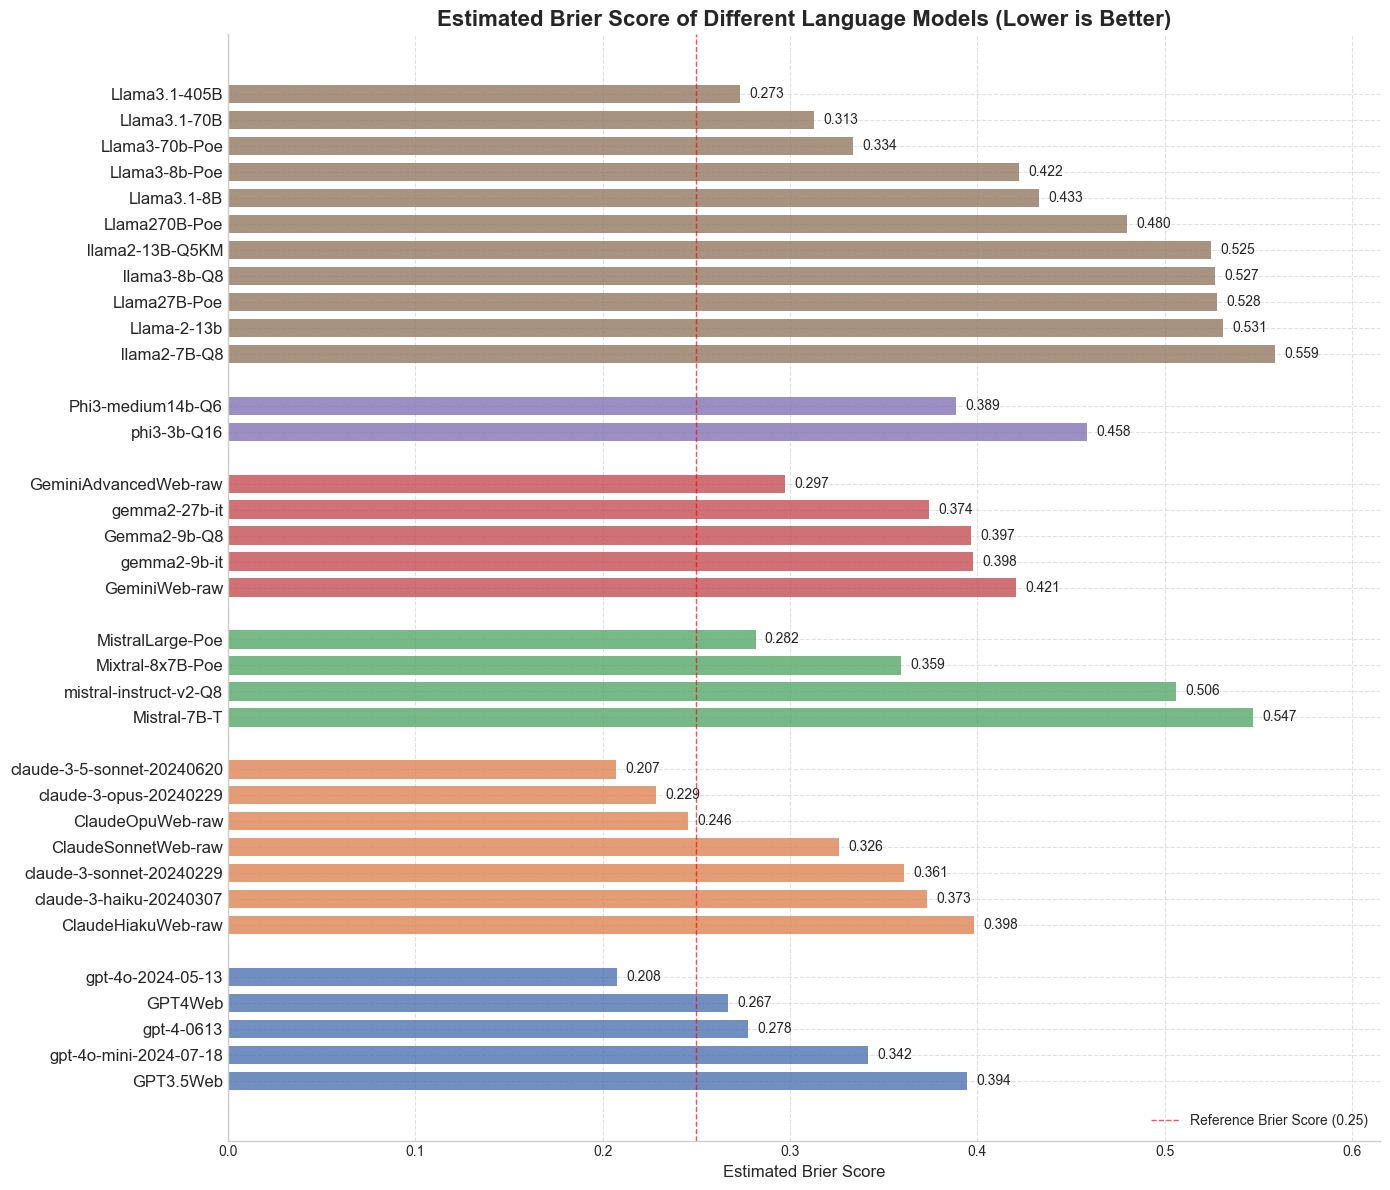

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to a more professional look
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Create DataFrames for each model list (assuming this part is unchanged)
# gpt_df, claude_df, mistral_df, google_df, phi_df, others_df

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 12))

# Keeping track of y-axis positions and labels
y_positions = []
y_tick_labels = []

# Gap between different model groups for visibility
gap_between_groups = 1

def plot_group(df, y_start, color):
    y_pos = list(range(y_start, y_start + len(df)))
    y_positions.extend(y_pos)
    y_tick_labels.extend(df.index)
    bars = ax.barh(y_pos, df['Estimated Brier Score'], align='center', 
                   color=color, alpha=0.8, height=0.7)
    
    # Add text inside the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=10)
    
    return y_start + len(df) + gap_between_groups

# Define a professional color palette
colors = sns.color_palette("deep", 6)

# Plot each group
y_start = 0
y_start = plot_group(gpt_df, y_start, colors[0])
y_start = plot_group(claude_df, y_start, colors[1])
y_start = plot_group(mistral_df, y_start, colors[2])
y_start = plot_group(google_df, y_start, colors[3])
y_start = plot_group(phi_df, y_start, colors[4])
y_start = plot_group(others_df, y_start, colors[5])

# Set the y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(y_tick_labels, fontsize=12)

# Set the title and labels
ax.set_title('Estimated Brier Score of Different Language Models (Lower is Better)', fontsize=16, fontweight='bold')
ax.set_xlabel('Estimated Brier Score', fontsize=12)

# Add a vertical line at x=0.25
ax.axvline(x=0.25, color='red', linestyle='--', linewidth=1, alpha=0.7, 
           label='Reference Brier Score (0.25)')

# Adjust x-axis to start from 0 and end slightly after the maximum score
max_score = max(df['Estimated Brier Score'].max() for df in [gpt_df, claude_df, mistral_df, google_df, phi_df, others_df])
ax.set_xlim(0, max_score * 1.1)

# Add subtle grid lines
ax.grid(True, linestyle='--', alpha=0.6)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend for the reference line
ax.legend(loc='lower right', fontsize=10)

# # Add a footnote
# plt.text(0.99, 0.01, 'Data source: Your Source Here', ha='right', va='bottom', 
#          transform=ax.transAxes, fontsize=8, alpha=0.7)

# Adjust layout and display
plt.tight_layout()

# Save plot as high-resolution image
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

# Save plot as PDF
plt.savefig('plot.pdf', dpi=300, bbox_inches='tight')

# Save plot as JPEG
plt.savefig('plot.jpg', dpi=300, bbox_inches='tight')

plt.show()

## calibration curve

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import os
import re

# Load the data
data = pd.read_csv('CSV/merged_confidence_correctness.csv')

# Create a folder to save the plots
output_folder = '_final_calibration_curves_2'
os.makedirs(output_folder, exist_ok=True)

def process_model(model_name, confidence_col, correctness_col):
    confidence = data[confidence_col].replace(['not_mentioned', 'cell_empty', 'NoA', 'NOP', 'EOP'], np.nan).astype(float)
    
    def parse_correctness(x):
        if isinstance(x, str):
            return 1 if x.lower() == 'correct' else 0
        elif isinstance(x, (int, float)):
            return 1 if x == 1 else 0
        else:
            return np.nan

    correctness = data[correctness_col].apply(parse_correctness)
    
    mask = ~(np.isnan(confidence) | np.isnan(correctness))
    confidence = confidence[mask]
    correctness = correctness[mask]
    
    # Ensure confidence is in [0, 10] range
    if confidence.max() <= 1:
        confidence = confidence * 10
    
    prob_true, prob_pred = calibration_curve(correctness, confidence / 10, n_bins=25, strategy='quantile')
    
    return prob_true, prob_pred * 10  # Scale prob_pred back to [0, 10] range

def find_matching_columns(pattern, columns):
    return [col for col in columns if re.match(pattern, col, re.IGNORECASE)]

# Sort models by Brier Score and get the 10 with lowest scores
top_10_models = results_df_sorted.sort_values('Estimated Brier Score').head(10)

# Define a list of professional academic colors
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Teal
]

# Process each model in the top 10
for i, model in enumerate(top_10_models.index):
    confidence_col = find_matching_columns(f'{model}_confidence$', data.columns)
    correctness_col = find_matching_columns(f'{model}_correctness$', data.columns)
    
    if confidence_col and correctness_col:
        prob_true, prob_pred = process_model(model, confidence_col[0], correctness_col[0])
        
        # Create a new figure for each model
        plt.figure(figsize=(10, 6))
        plt.plot([0, 10], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
        plt.plot(prob_pred, prob_true, marker='o', color=colors[i], 
                 label=f'{model}\nBrier Score: {top_10_models.loc[model, "Estimated Brier Score"]:.4f}')
        
        plt.xlabel('Mean predicted probability')
        plt.ylabel('Fraction of correct results')
        plt.title(f'Calibration Curve for {model}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.xlim(0, 10)
        plt.ylim(0, 1)
        
        # Save the individual plot
        plt.savefig(os.path.join(output_folder, f'{model}_calibration_curve.png'), dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(output_folder, f'{model}_calibration_curve.pdf'), dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(output_folder, f'{model}_calibration_curve.jpg'), dpi=300, bbox_inches='tight')
        plt.close()

print(f"Individual calibration curves for top 10 models have been saved in the '{output_folder}' folder.")

Individual calibration curves for top 10 models have been saved in the '_final_calibration_curves_2' folder.
